# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\61467\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en")

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass

# Creating a DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
3,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...
4,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...


In [7]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu})
        
    except AttributeError:
        pass
    
# Creating a DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)
# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
1,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...
2,0.2732,0.000,0.938,0.062,"ConsenSys, a key player in crypto and a major ..."
3,-0.4019,0.080,0.920,0.000,"Move fast, break things, get hacked.\r\nThat’s..."
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...


In [8]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.293980,0.018000,0.901600,0.080350
std,0.305899,0.040337,0.081842,0.066469
min,-0.510600,0.000000,0.709000,0.000000
25%,0.070800,0.000000,0.865000,0.047250
50%,0.329100,0.000000,0.932500,0.066500
75%,0.432825,0.000000,0.940250,0.103750
max,0.771700,0.142000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.040265,0.031350,0.932100,0.036550
std,0.303996,0.038254,0.065755,0.049016
min,-0.571900,0.000000,0.735000,0.000000
25%,-0.115300,0.000000,0.916750,0.000000
50%,0.000000,0.000000,0.937000,0.000000
75%,0.289900,0.063500,0.972250,0.065000
max,0.565000,0.101000,1.000000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
def tokenizer(text):
    """Tokenizes text."""

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
    sw = stopwords.words("english")
    sw.append("seen")
    sw.append("char")
    sw.append("file")
    sw.append("dado")
    sw.append("chars")
    sw.append("staff")
    sw.append("photo")
    sw.append("since")
    sw.append("taken")
    sw.append("illustration")
    sw.append("representation")

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', text)
    
    # Remove the punctuation from text
    words = word_tokenize(re_clean)
   
    # Create a tokenized list of the words
    sw = stopwords.words("english")
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = [word.lower() for word in words]
    
    # Remove the stop words
    words = [word for word in words if word not in sw]
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...,"[Whether, youre, looking, to, make, a, larger,..."
1,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[As, it, promised, earlier, this, year, Tesla,..."
2,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[The, crypto, industry, a, a, whole, ha, seen,..."
3,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...,"[The, inevitable, ha, happened, You, can, now,..."
4,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...,"[Tesla, made, headline, earlier, this, year, w..."


In [14]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head(5)

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[Whether, youre, looking, to, make, a, larger,..."
1,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...,"[Payment, card, network, Visa, ha, announced, ..."
2,0.2732,0.000,0.938,0.062,"ConsenSys, a key player in crypto and a major ...","[ConsenSys, a, key, player, in, crypto, and, a..."
3,-0.4019,0.080,0.920,0.000,"Move fast, break things, get hacked.\r\nThat’s...","[Move, fast, break, thing, get, hacked, That, ..."
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...,"[The, NFT, craze, ha, been, an, intriguing, mo..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_text = bitcoin_df["text"].str.cat()
clean_bitcoin_text =  tokenizer(bitcoin_text)
bigram_counts = Counter(ngrams(clean_bitcoin_text, n=2))
bigram_counts.most_common(20)

[(('char', 'The'), 4),
 (('char', 'By'), 4),
 (('By', 'Reuters'), 4),
 (('Reuters', 'Staff'), 4),
 (('this', 'year'), 3),
 (('to', 'Tesla'), 3),
 (('in', 'bitcoin'), 3),
 (('t', 'char'), 3),
 (('of', 'the'), 3),
 (('a', 'new'), 3),
 (('earlier', 'this'), 2),
 (('according', 'to'), 2),
 (('Elon', 'Musk'), 2),
 (('In', 'a'), 2),
 (('due', 'to'), 2),
 (('You', 'can'), 2),
 (('can', 'now'), 2),
 (('a', 'Tesla'), 2),
 (('fungible', 'token'), 2),
 (('and', 'the'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_text = ethereum_df["text"].str.cat()
clean_ethereum_text =  tokenizer(ethereum_text)
bigram_E_counts = Counter(ngrams(clean_ethereum_text, n=2))
bigram_E_counts.most_common(20)

[(('the', 'Ethereum'), 4),
 (('of', 'the'), 3),
 (('char', 'The'), 3),
 (('fungible', 'token'), 3),
 (('on', 'the'), 3),
 (('ha', 'announced'), 2),
 (('Ethereum', 'blockchain'), 2),
 (('crypto', 'and'), 2),
 (('a', 'major'), 2),
 (('NFT', 'craze'), 2),
 (('ha', 'been'), 2),
 (('for', 'digital'), 2),
 (('a', 'much'), 2),
 (('non', 'fungible'), 2),
 (('one', 'of'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('at', 'the'), 2),
 (('In', 'a'), 2),
 (('This', 'article'), 2),
 (('article', 'wa'), 2)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(clean_bitcoin_text, N=10)

[('a', 23),
 ('char', 20),
 ('of', 19),
 ('the', 18),
 ('to', 16),
 ('in', 13),
 ('it', 10),
 ('bitcoin', 10),
 ('Bitcoin', 9),
 ('and', 9)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(clean_ethereum_text, N=10)

[('the', 29),
 ('a', 25),
 ('to', 20),
 ('char', 19),
 ('of', 17),
 ('and', 11),
 ('in', 10),
 ('on', 9),
 ('for', 8),
 ('Ethereum', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
import numpy as np
from PIL import Image
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


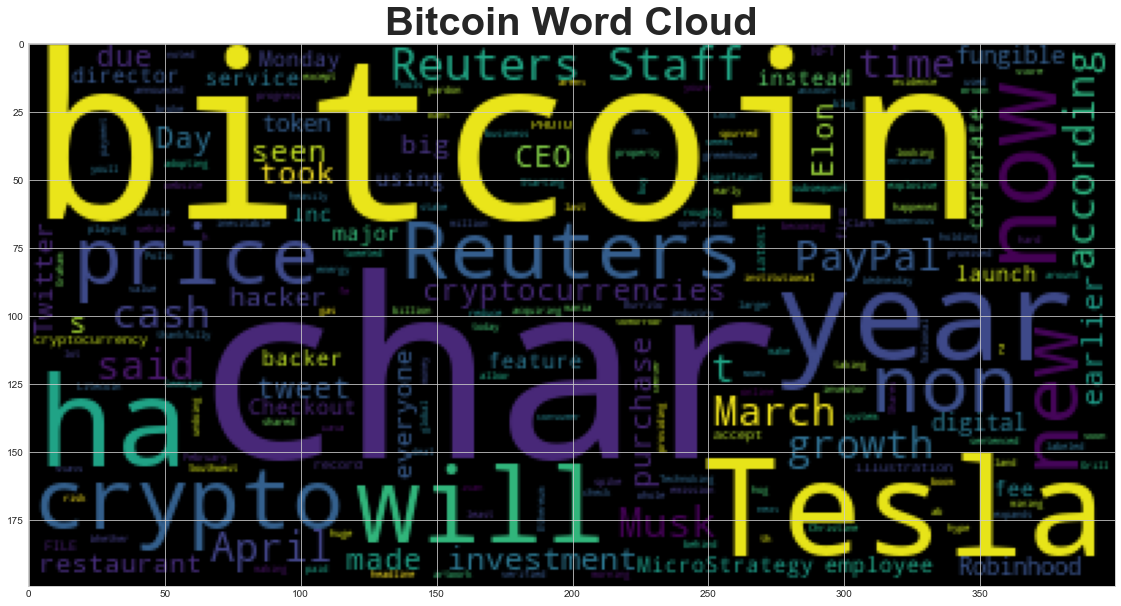

In [22]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
big_string = ' '.join(clean_bitcoin_text)
wc = WordCloud().generate(big_string)
plt.title("Bitcoin Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

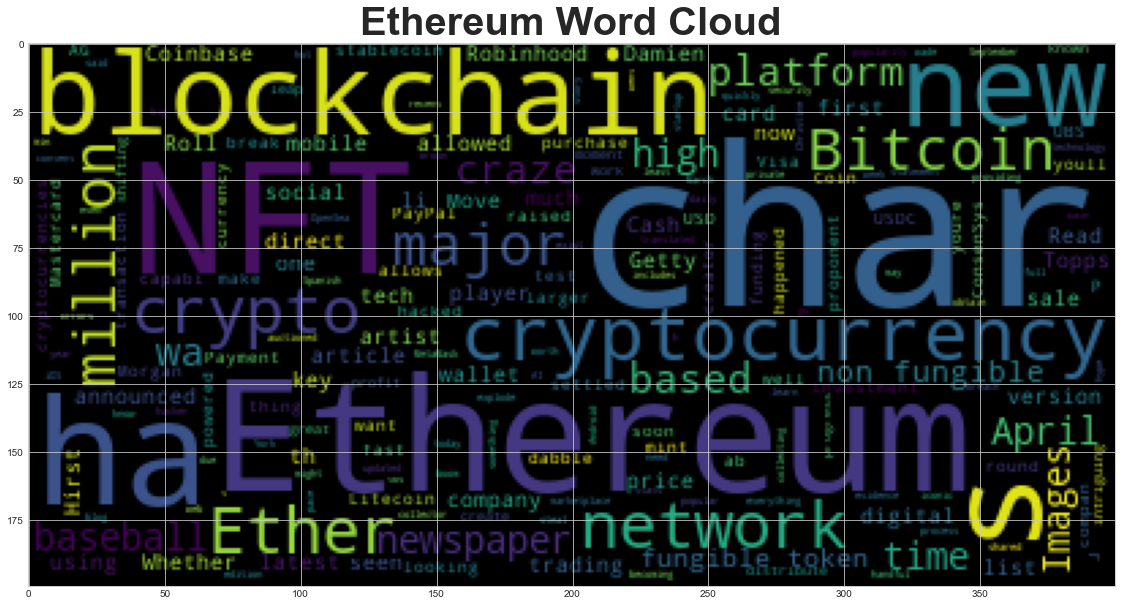

In [23]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
big_string = ' '.join(clean_ethereum_text)
wc = WordCloud().generate(big_string)
plt.title("Ethereum Word Cloud", fontsize=40, loc="center", fontweight="bold")
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()


In [27]:
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
bitcoin_text

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars]The crypto industry as a whole has seen a momentous year of growth, heavily spurred on by the entrance of institutional investors adopting bitcoin due to its store of value properties. The 2020 spike… [+4675 chars]The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars]Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at t

In [37]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(bitcoin_text)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data["title"] = "Bitcoin NER"

In [38]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [39]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print(ent.text, ent.label_)

Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
a momentous year DATE
2020 DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
Burrito Day PERSON
April Fools Day DATE
this year DATE
tomorrow DATE
Pollo Loco FAC
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
millions CARDINAL
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Funko PERSON
NFT ORG
TokenWave ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
the United States GPE
FD Funds Management LLC ORG
PayPal PERSON
Julian Satterthwaite PERSON
Reuters ORG
LONDON GPE
April 13 DATE
Reuters ORG
62,575 MONEY
Tuesday DATE
2021 DATE
Reuters ORG
Bitcoin PERSON
March 15, 2021 DATE
March 26 DATE


---

### Ethereum NER

In [40]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
ethereum_text

"Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars]Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars]ConsenSys, a key player in crypto and a major proponent of the Ethereum blockchain, has raised a\xa0$65 million funding round from\xa0J.P. Morgan, Mastercard, and UBS AG, as well as major blockchain compan… [+8767 chars]Move fast, break things, get hacked.\r\nThat’s what happened at Roll, the social currency platform that allows creators to mint and distribute their own Ethereum-based cryptocurrency known as social to… [+3813 chars]The NFT craze has been an intriguing moment for digital artists who have seen seen great leaps in how tech has allowed them to create t

In [41]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc_1 = nlp(ethereum_text)

# Add a title to the document
# YOUR CODE HERE!
doc_1.user_data["title"] = "Ethereum NER"

In [42]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc_1, style='ent')

In [43]:
# List all Entities
# YOUR CODE HERE!
for ent in doc_1.ents:
    print(ent.text, ent.label_)

Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Ethereum ORG
NFT ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
chars]MetaMask PERSON
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
26, 2021 DATE
Spanish NORP
AI ORG
New York Times ORG
daily DATE
Topps GPE
first ORDINAL
NFT ORG
36.32 MONEY
April 3 DATE
90% PERCENT
as much as 8% PERCENT
Tuesday DATE
Coinbase ORG
Berlin GPE
April 14 DATE
hours TIME
Beeple’s ORG
$69 million MONEY
NFT ORG
24 CARDINAL
24 CARDINAL
Ethereum PERSON
Images/Getty Images ORG
above $2,400 MONEY
Thursday DATE
$100 billion MONEY
MLB ORG
NFT ORG
Major League Baseball ORG
NFT ORG
Topps GPE
16th ORDINAL
April 2021 DATE
The Art Newspaper ORG
CNN ORG
Hirst PERSON
Chris Young PERSON
Superstar PERSON
Damien Hirst PERSON
Ethereum ORG
Da

---